# Code for visualize the feature maps of a convolutional neural network

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from torch.hub import load_state_dict_from_url
import matplotlib.pyplot as plt
import math
import torchvision.transforms as transforms
from torchvision import models

In [2]:

from PIL import Image
import requests
from io import BytesIO
url ="https://github.com/SalvatoreRa/CNNscan/blob/main/img/manja-vitolic-gKXKBY-C-Dk-unsplash.jpg?raw=true"
response = requests.get(url)
im = Image.open(BytesIO(response.content))


In [3]:
def fetch_feature_maps(model, img):
  '''
  fetch and plot the feature maps
  parameters:
  model = a CNN
  img = an image
  return
  the plot of feature maps
  '''
  norm_mean = [0.485, 0.456, 0.406]
  norm_std = [0.229, 0.224, 0.225]

  data_transform = transforms.Compose([
          transforms.Resize(256),
          transforms.CenterCrop(256),
          transforms.ToTensor(),
          transforms.Normalize(norm_mean, norm_std),
      ])
  im = data_transform(img)

  def fetcher(image, model):
    model_children = list(list(model.children())[0])
    results=[model_children[0](image)]
    for i in range(1,len(model_children)):
      results.append(model_children[i](results[-1]))
    features = [results[i] for i in [2,5,12]]
    return features

  feature_maps = fetcher(im.unsqueeze(0), model)
  for num_layer in range(len(feature_maps)):
    layer_viz = feature_maps[num_layer][0, :, :, :]
    layer_viz = layer_viz.data
    print(layer_viz.size())
    fig, axis =plt.subplots(2, 8, figsize=(20, 10))
    ax = axis.flatten()
    for i in range(len(ax)):
        ax[i].imshow(layer_viz[i], cmap="gray")
        ax[i].set_title(str(i))
        ax[i].axis('off')

    plt.show()
    plt.close()

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth
100%|██████████| 233M/233M [00:03<00:00, 66.0MB/s]


torch.Size([64, 31, 31])


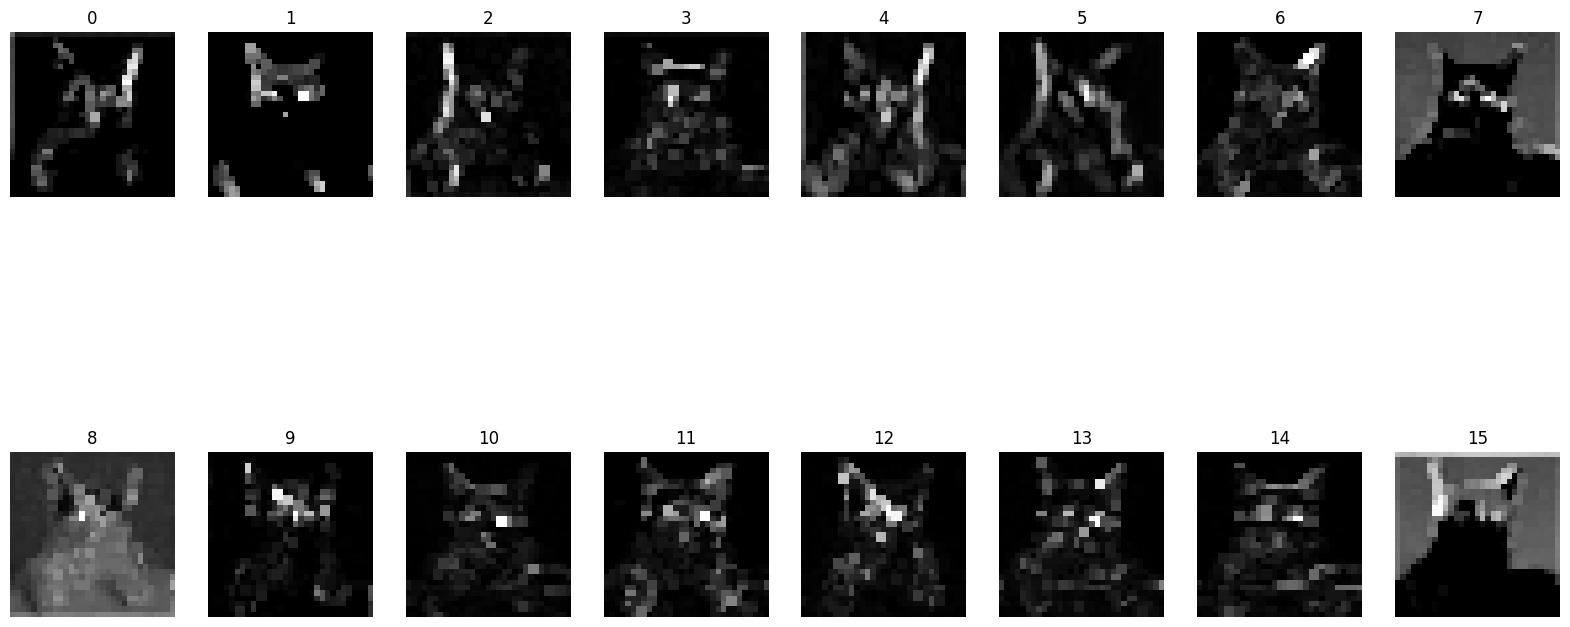

torch.Size([192, 15, 15])


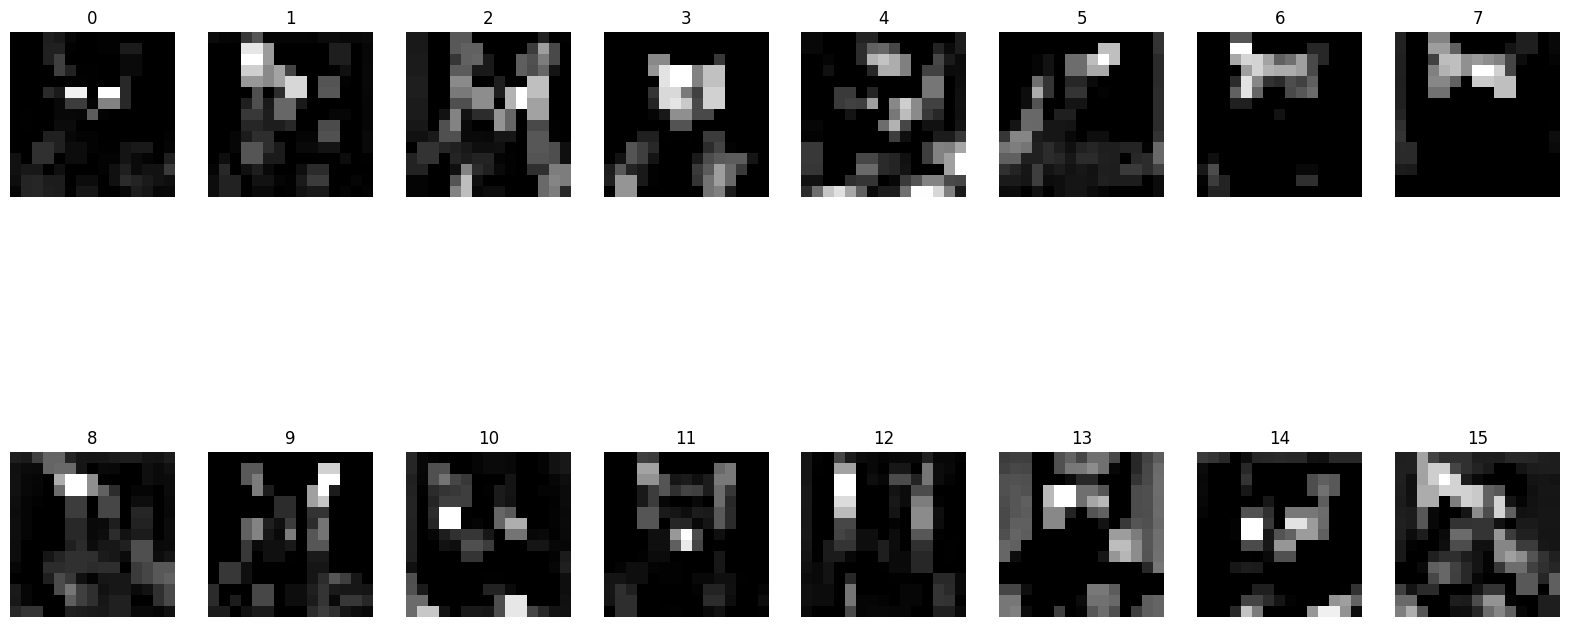

torch.Size([256, 7, 7])


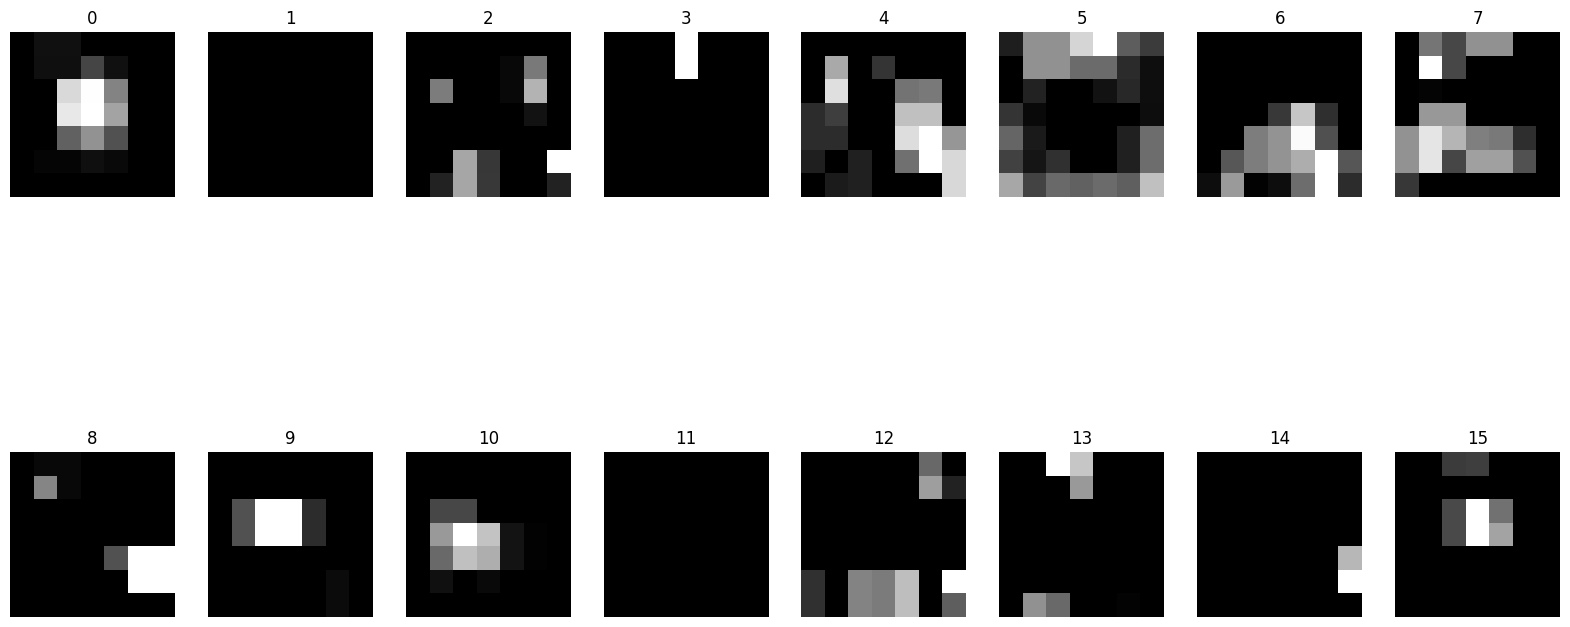

In [4]:
pret_mod = models.alexnet(pretrained=True)
fetch_feature_maps(pret_mod, im)